In [1]:
from classy import Class
import matplotlib.pyplot as plt
import numpy as np

----
## 1. Ottengo direttamente T(k)
----

In [78]:
#redshift
z = 0
A_s = 2.100549e-09
n_s = 0.965

In [71]:
LambdaCDM = Class()
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':A_s,'n_s':n_s,'tau_reio':0.05430842,'N_ncdm':1, 'm_ncdm':0.06})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk,mTk','lensing':'yes','P_k_max_1/Mpc':3.0})
# lancio la classe
LambdaCDM.compute()


In [72]:
one_time = LambdaCDM.get_transfer(z)
ka = one_time['k (h/Mpc)']
d_g = one_time['d_g']
d_b = one_time['d_b']
d_cdm = one_time['d_cdm']
d_ncdm = abs(one_time['d_ncdm[0]'])
d_m = one_time['d_m']
d_tot = one_time['d_tot']
phi = one_time['phi']
psi = one_time['psi']

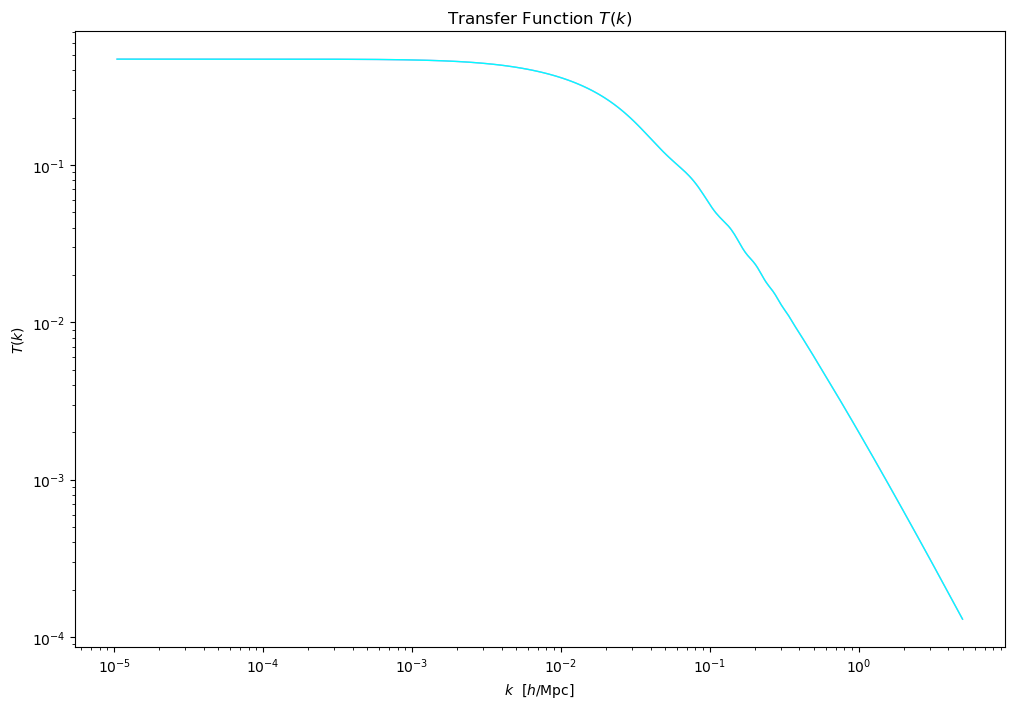

In [74]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
ax.set_ylabel(r'$T(k)$')
ax.set_title('Transfer Function $T(k)$')
#ax.plot(k, d_g, color='#424B54', lw=1, label='d_g')
#ax.plot(k, d_b, color='green', lw=1, label='d_b')
#ax.plot(k, d_cdm, color='b', lw=1, label='d_cdm')
#ax.plot(k, d_ncdm, color='k', lw=1, label='d_ncdm')
#ax.plot(k, d_m, color='red', lw=1, label='d_m')
#ax.plot(k, d_tot, color='purple', lw=1, label='d_tot')
ax.plot(ka, phi, color='violet', lw=1, label='psi')
ax.plot(ka, psi, color='cyan', lw=1, label='psi')
plt.show()

In [75]:
primordial = LambdaCDM.get_primordial()

In [79]:
k_piv = 0.05 
k_1 = primordial['k [1/Mpc]']
Ppk = []
for i in range(len(k_1)):
    Ppk.append(A_s*(k_1[i] / k_piv)**(LambdaCDM.n_s()-1))
Ppk_cl = primordial['P_scalar(k)']

in class P_primordiale è quello moltiplicato per k^3/2pi^2

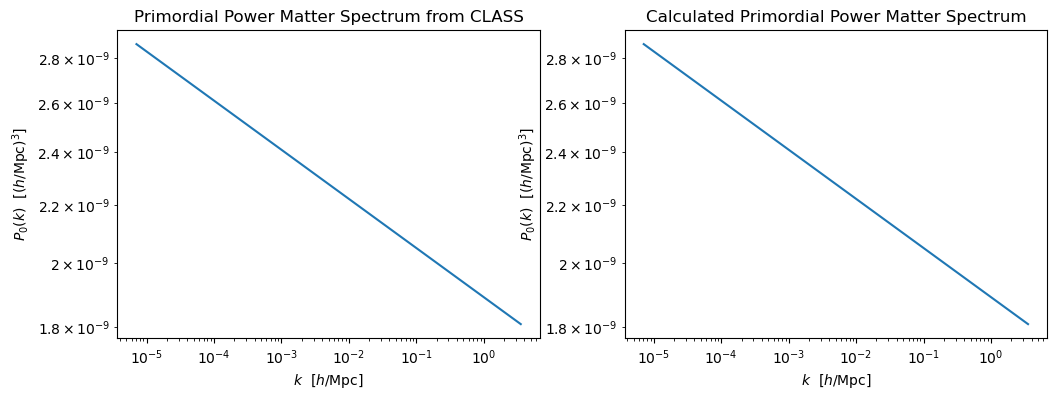

In [80]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax1.set_xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
ax1.set_ylabel(r'$P_0(k) \,\,\,\, [(h/\mathrm{Mpc})^3]$')
ax2.set_xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
ax2.set_ylabel(r'$P_0(k) \,\,\,\, [(h/\mathrm{Mpc})^3]$')
ax1.set_title('Primordial Power Matter Spectrum from CLASS')
ax2.set_title('Calculated Primordial Power Matter Spectrum')
ax1.plot(k_1, Ppk_cl)
ax2.plot(k_1, Ppk)


----
## MPS
----

In [81]:
Pk = []
for k in k_1:
        Pk.append(LambdaCDM.pk(k * LambdaCDM.h(), 0.) * LambdaCDM.h() ** 3)

----
## Calcolo T_f
----

In [82]:
a_f = 1/1+z
H_0 = LambdaCDM.h()*100
omega_mz = LambdaCDM.Omega_m()
c = 299792.458

In [83]:
Phi_1 = [] #calcolato con il valore di P_prim di class
Phi_2 = [] #calcolato con il valore di P_prim calcolato da me
for i in range (len(k_1)):
    Phi_1.append(k_1[i]**(1.5)*np.sqrt(Pk[i]/Ppk_cl[i])*(3*(H_0**2)*omega_mz)/(2*((c*k_1[i])**2)*a_f))
    Phi_2.append(k_1[i]**(1.5)*np.sqrt(Pk[i]/Ppk[i])*(3*(H_0**2)*omega_mz)/(2*((c*k_1[i])**2)*a_f))


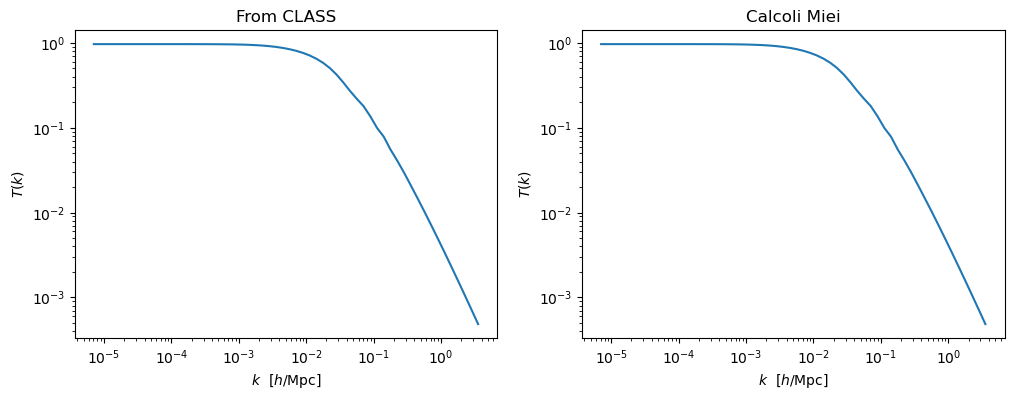

In [84]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax1.set_xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
ax1.set_ylabel(r'$T(k)$')
ax2.set_xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
ax2.set_ylabel(r'$T(k)$')
ax1.set_title('From CLASS')
ax2.set_title('Calcoli Miei')
ax1.plot(k_1, Phi_1)
ax2.plot(k_1, Phi_2)

In [85]:
Phi_2

[0.9689728967160443,
 0.9689728967160446,
 0.968972657628747,
 0.9689717497629277,
 0.9689703110225917,
 0.968967937069414,
 0.9689641753629472,
 0.9689581528362907,
 0.9689486592344128,
 0.9689336023750701,
 0.9689097716882892,
 0.9688720694252589,
 0.9688124427854604,
 0.9687182571434896,
 0.9685697723450326,
 0.9683363918143937,
 0.9679712709041701,
 0.9674040189178872,
 0.966531747446486,
 0.9652094470347377,
 0.9632418241430413,
 0.9603755864077256,
 0.9562858090810585,
 0.9505504389448337,
 0.9426222942076257,
 0.9318576714661571,
 0.9175126329420068,
 0.8987944650911907,
 0.8748998415695756,
 0.8450473786319599,
 0.8084907146393229,
 0.7645353614617809,
 0.7125851665837243,
 0.6521863837545292,
 0.5832222359143217,
 0.5063165302575304,
 0.42405092765491653,
 0.34253863119859707,
 0.27171222236756193,
 0.21960970894908433,
 0.18006211240078604,
 0.13669844925046212,
 0.099802402091079,
 0.07850671087466862,
 0.055442643912409884,
 0.04099537638745658,
 0.029701887481675716,
 0.02

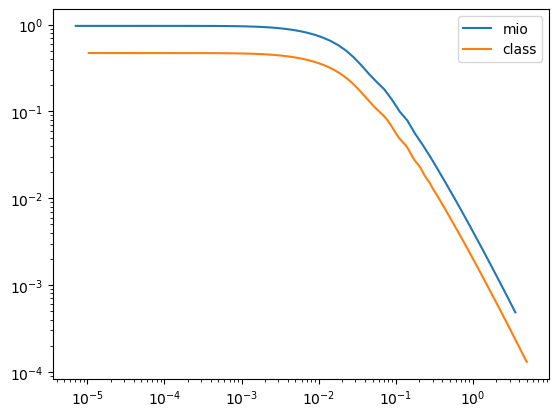

In [86]:
plt.loglog(k_1, Phi_2, label='mio')
plt.loglog(ka,phi, label='class')
plt.legend()
